# **INTRODUCTION TO OPTIONS**

[Basics of options](https://corporatefinanceinstitute.com/resources/derivatives/options-calls-and-puts/)

In [ ]:
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date


import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

**IMPORTING DATA FOR OPTIONS**

In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #to get data of next recent expiry date

In [ ]:
dfo_exp.calls #Data for call options

In [ ]:
dfo_exp.puts #Data for put options

In [ ]:
#run this tab to make you aware of the latest price of apple stock

symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)


# Read data
df = yf.download(symbol,start,end)

df.tail()

# **PAYOFF FROM CALL AND PUT OPTIONS**

# **Call option**
payoff=max(-C, S - X - C)


# **Put option**
payoff=max(-P, X - S - P)

P and C are premiums of calls and puts

S is the stock price

X is the strike price

In [ ]:
def payoff(option_type, premium, S, X):
  if option_type=='C':
     Payoff=max(-premium,S-X-premium)
     return Payoff
  elif option_type=='P':
     Payoff=max(-premium,X-S-premium)
     return Payoff

  else:
    print("option type not supported")

Checking the output of payoff function

In [ ]:
payoff('C', 10, 120,100)  #answer displayed should be 10

In [ ]:
payoff('Z', 10, 120, 100)  #answer displayed should be option type not supported

In [ ]:
payoff('P', 10, 120, 100)  #answer displayed should be -10

# **PAYOFF GRAPHS**

**CALL OPTION**

In [ ]:
X = dfo_exp.calls['strike'][0]
premium = dfo_exp.calls['lastPrice'][0]

In [ ]:
StockPrice = np.arange(0, 6000)
Payoff = [payoff('C', premium, i, X) for i in StockPrice]

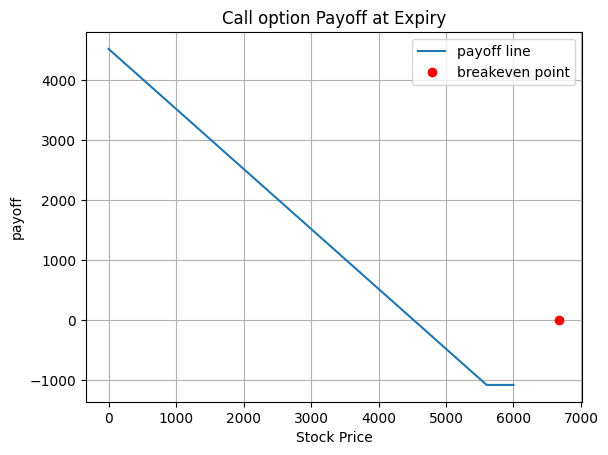

In [ ]:
#PLOTTING THE PAYOFF GRAPH FOR CALL OPTION
plt.plot(StockPrice, Payoff, label = 'payoff line')
plt.xlabel('Stock Price')
plt.ylabel('payoff')
plt.title('Call option Payoff at Expiry')
plt.grid(True)

#breakeven point is when payoff is 0 or S=X+C
plt.plot(X+premium, 0, 'ro', label = 'breakeven point')
plt.legend()

**PUT OPTION**

In [ ]:
X = dfo_exp.puts['strike'][len(dfo_exp.puts)-1]
premium = dfo_exp.puts['lastPrice'][len(dfo_exp.puts)-1]

In [ ]:
StockPrice = np.arange(0, 6000)
Payoff = [payoff('P', premium, i, X) for i in StockPrice]

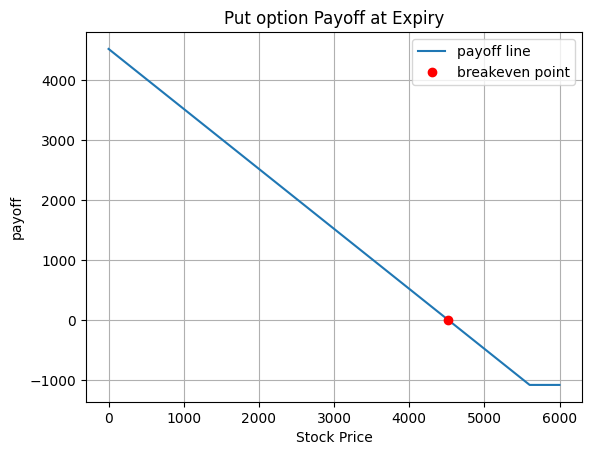

In [ ]:
#PLOTTING THE PAYOFF GRAPH FOR PUT OPTION
plt.plot(StockPrice, Payoff, label = 'payoff line')
plt.xlabel('Stock Price')
plt.ylabel('payoff')
plt.title('Put option Payoff at Expiry')
plt.grid(True)

#breakeven point is when payoff is 0 or S=X-P
plt.plot(X-premium, 0, 'ro', label = 'breakeven point')
plt.legend()